## Week 12 Assignment
### Preprocessing Data for scikit-learn

In [121]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

We start by importing the mushroom dataset as a pandas DataFrame object:

In [122]:
names = ['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
         'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
         'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
         'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type',
         'spore-print-color', 'population', 'habitat']

df = pd.read_csv('C:/Users/cscam/mushroom/agaricus-lepiota.data', names = names)
df

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Rather than analyse the entire dataset, we will focus on three columns: edible/poisonous, odor, and cap color.

In [123]:
new_df = df[['poisonous', 'odor', 'cap-color']]
new_df

,poisonous,odor,cap-color
0,p,p,n
1,e,a,y
2,e,l,w
3,p,p,w
4,e,n,g
...,...,...,...
8119,e,n,n
8120,e,n,n
8121,e,n,n
8122,p,y,n


Notice that the values are represented as characters. We will need to convert these to numerics in order to process them with scikit-learn:

In [124]:
#poisonous_key = {'p':'poisonous', 'e':'edible'}
poisonous_key = {'p':1, 'e':0}
#odor_key = {'a':'almond', 'l':'anise', 'c':'creosote', 'y':'fishy', 'f':'foul', 'm':'musty', 'n':'none',
#            'p':'pungent', 's':'spicy'}
odor_key = {'a':0, 'l':1, 'c':2, 'y':3, 'f':4, 'm':5, 'n':6, 'p':7, 's':8}
#cap_color_key = {'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'r':'green', 'p':'pink', 'u':'purple',
#                 'e':'red', 'w':'white', 'y':'yellow'}
cap_color_key = {'n':0, 'b':1, 'c':2, 'g':3, 'r':4, 'p':5, 'u':6, 'e':7, 'w':8, 'y':9}

new_df['poisonous'] = new_df['poisonous'].map(poisonous_key)
new_df['odor'] = new_df['odor'].map(odor_key)
new_df['cap-color'] = new_df['cap-color'].map(cap_color_key)

C:\Users\cscam\AppData\Local\Temp\ipykernel_21688\2111659167.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['poisonous'] = new_df['poisonous'].map(poisonous_key)
C:\Users\cscam\AppData\Local\Temp\ipykernel_21688\2111659167.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['odor'] = new_df['odor'].map(odor_key)
C:\Users\cscam\AppData\Local\Temp\ipykernel_21688\2111659167.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [125]:
new_df

,poisonous,odor,cap-color
0,1,7,0
1,0,0,9
2,0,1,8
3,1,7,8
4,0,6,3
...,...,...,...
8119,0,6,0
8120,0,6,0
8121,0,6,0
8122,1,3,0


Now we can use matplotlib to generate charts from the data we have prepared:

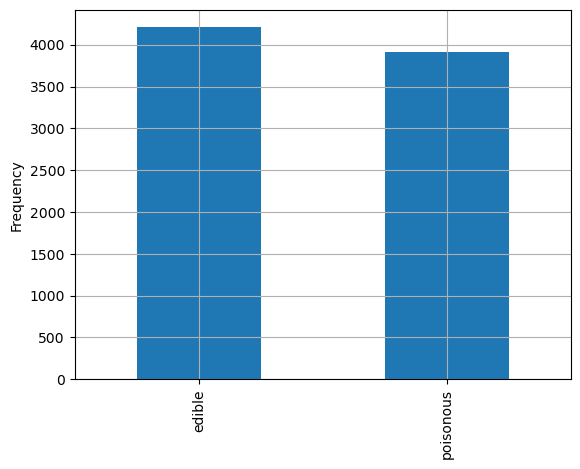

In [126]:
new_df['poisonous'].value_counts().plot(kind='bar')
plt.xticks([0,1], ['edible','poisonous'])
plt.grid()
plt.ylabel('Frequency');
plt.show()

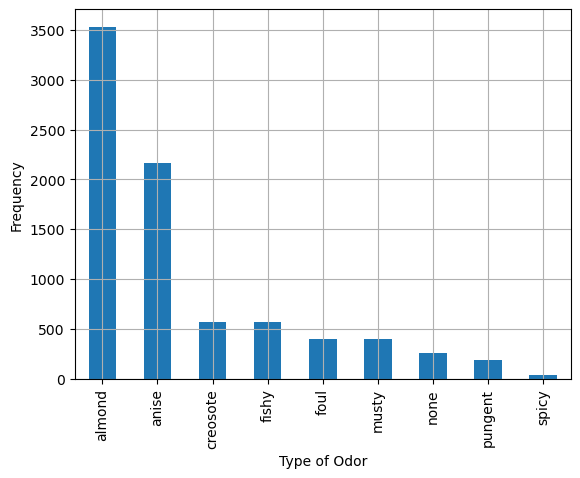

In [127]:
new_df['odor'].value_counts().plot(kind='bar')
plt.xticks([0,1,2,3,4,5,6,7,8], ['almond', 'anise', 'creosote', 'fishy', 'foul', 'musty', 'none','pungent', 'spicy'])
plt.grid()
plt.xlabel('Type of Odor');
plt.ylabel('Frequency');
plt.show()

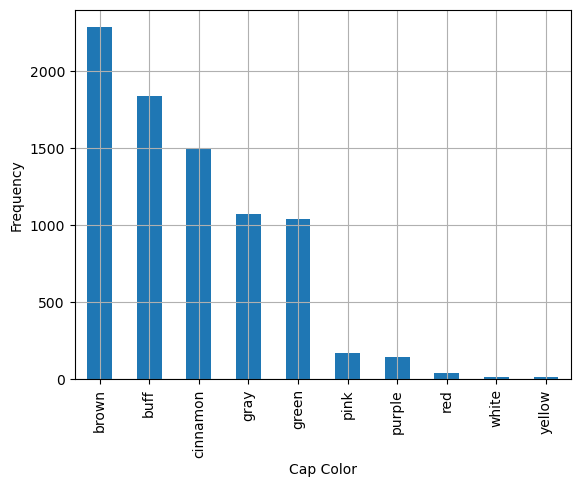

In [128]:
new_df['cap-color'].value_counts().plot(kind='bar');
plt.xticks([0,1,2,3,4,5,6,7,8,9], ['brown', 'buff', 'cinnamon', 'gray', 'green', 'pink', 'purple','red', 'white', 'yellow'])
plt.grid()
plt.xlabel('Cap Color');
plt.ylabel('Frequency');
plt.show()

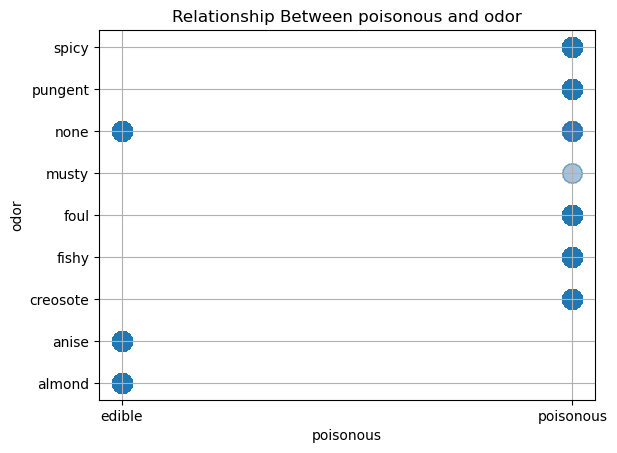

In [129]:
new_df.plot(kind='scatter', x='poisonous', y='odor', title='Relationship Between poisonous and odor', s = 200, alpha = 0.01);
plt.grid()
plt.xticks([0,1], ['edible','poisonous'])
plt.yticks([0,1,2,3,4,5,6,7,8], ['almond', 'anise', 'creosote', 'fishy', 'foul', 'musty', 'none','pungent', 'spicy'])
plt.show()

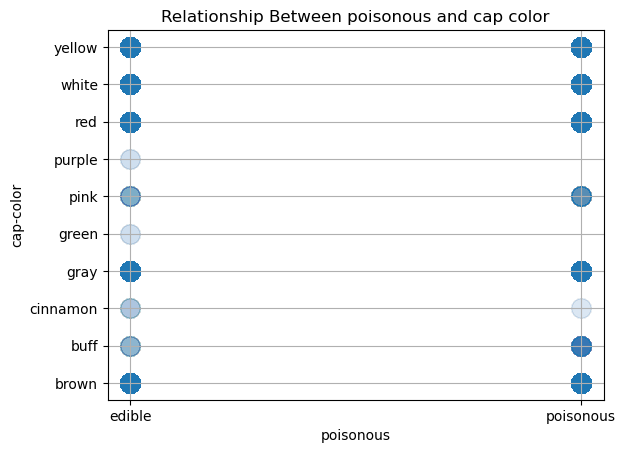

In [130]:
new_df.plot(kind='scatter', x='poisonous', y='cap-color', title='Relationship Between poisonous and cap color', s = 200, alpha = 0.01);
plt.grid()
plt.xticks([0,1], ['edible','poisonous'])
plt.yticks([0,1,2,3,4,5,6,7,8,9], ['brown', 'buff', 'cinnamon', 'gray', 'green', 'pink', 'purple','red', 'white', 'yellow'])
plt.show()

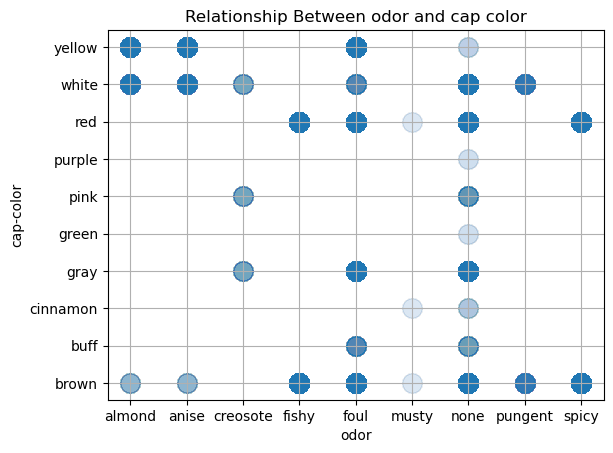

In [131]:
new_df.plot(kind='scatter', x='odor', y='cap-color', title='Relationship Between odor and cap color', s = 200, alpha = 0.01);
plt.grid()
plt.xticks([0,1,2,3,4,5,6,7,8], ['almond', 'anise', 'creosote', 'fishy', 'foul', 'musty', 'none','pungent', 'spicy'])
plt.yticks([0,1,2,3,4,5,6,7,8,9], ['brown', 'buff', 'cinnamon', 'gray', 'green', 'pink', 'purple','red', 'white', 'yellow'])
plt.show()

While the bar charts clearly show the frequency of odors and colors, the scatter plots do not show any consistent relationship between variables. There is a near even distribution of edible and poisonous mushrooms in the dataset, and there appears to be no accurate way to determine this property by looking at odor or cap color alone.